In [13]:
import hist as hist2
import glob
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({"font.size": 11})

In [11]:
# output directory with full set of jobs
year = "2017"
odir = f"../Jan20_{year}/"

# only saved labels for Higgs or Top (not QCD..)
# more info here: https://github.com/rkansal47/HHbbVV/blob/main/src/HHbbVV/processors/TaggerInputSkimmer.py#L60-L113
labels = {
    "label_H_WqqWqq_0c": "( (fj_H_VV_4q==1) & (fj_nprongs==4) & (fj_ncquarks==0) )",
    "label_H_WqqWqq_1c": "( (fj_H_VV_4q==1) & (fj_nprongs==4) & (fj_ncquarks==1) )",
    "label_H_WqqWqq_2c": "( (fj_H_VV_4q==1) & (fj_nprongs==4) & (fj_ncquarks==2) )",
    "label_H_WqqWq_0c": "( (fj_H_VV_4q==1) & (fj_nprongs==3) & (fj_ncquarks==0) )",
    "label_H_WqqWq_1c": "( (fj_H_VV_4q==1) & (fj_nprongs==3) & (fj_ncquarks==1) )",
    "label_H_WqqWq_2c": "( (fj_H_VV_4q==1) & (fj_nprongs==3) & (fj_ncquarks==2) )",
    "label_H_WW2lep": "(fj_lepinprongs==2)",
    "label_H_WW0lep": "(fj_lepinprongs==0)",
    "label_H_WqWev": "(fj_H_VV_elenuqq==1) & (fj_nprongs==1) & (fj_lepinprongs==1)",
    "label_H_WqWmv": "(fj_H_VV_munuqq==1) & (fj_nprongs==1) & (fj_lepinprongs==1)",
    "label_H_WqqWev_0c": "( (fj_H_VV_elenuqq==1) & (fj_nprongs>=2) & (fj_ncquarks==0) )",
    "label_H_WqqWev_1c": "( (fj_H_VV_elenuqq==1) & (fj_nprongs>=2) & (fj_ncquarks==1) )",
    "label_H_WqqWmv_0c": "( (fj_H_VV_munuqq==1) & (fj_nprongs>=2) & (fj_ncquarks==0) )",
    "label_H_WqqWmv_1c": "( (fj_H_VV_munuqq==1) & (fj_nprongs>=2) & (fj_ncquarks==1) )",
    "label_H_WqqWtauev_0c": "( (fj_H_VV_leptauelvqq==1) & (fj_nprongs>=2) & (fj_ncquarks==0) )",
    "label_H_WqqWtauev_1c": "( (fj_H_VV_leptauelvqq==1) & (fj_nprongs>=2) & (fj_ncquarks==1) )",
    "label_H_WqqWtaumv_0c": "( (fj_H_VV_leptaumuvqq==1) & (fj_nprongs>=2) & (fj_ncquarks==0) )",
    "label_H_WqqWtaumv_1c": "( (fj_H_VV_leptaumuvqq==1) & (fj_nprongs>=2) & (fj_ncquarks==1) )",
    "label_H_WqqWtauhv_0c": "( (fj_H_VV_hadtauvqq==1) & (fj_nprongs>=2) & (fj_ncquarks==0) )",
    "label_H_WqqWtauhv_1c": "( (fj_H_VV_hadtauvqq==1) & (fj_nprongs>=2) & (fj_ncquarks==1) )",
    "label_Top_nob": "(fj_Top_bmerged==0)",
    "label_Top_bWqq_0c": "( (fj_Top_2q==1) & (fj_nprongs == 2)  & (fj_Top_bmerged==1) & (fj_ncquarks==0) )",
    "label_Top_bWqq_1c": "( (fj_Top_2q==1) & (fj_nprongs == 2) & (fj_Top_bmerged==1) & (fj_ncquarks==1) )",
    "label_Top_bWq_0c": "( (fj_Top_2q==1) & (fj_nprongs == 1) & (fj_Top_bmerged==1) & (fj_ncquarks==0) )",
    "label_Top_bWq_1c": "( (fj_Top_2q==1) & (fj_nprongs == 1) & (fj_Top_bmerged==1) & (fj_ncquarks==1) )",
    "label_Top_bWev": "( (fj_Top_elenu==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWmv": "( (fj_Top_munu==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWtauhv": "( (fj_Top_hadtauvqq==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWtauev": "( (fj_Top_leptauelvnu==1) & (fj_Top_bmerged==1) )",
    "label_Top_bWtaumv": "( (fj_Top_leptaumuvnu==1) & (fj_Top_bmerged==1) )",
    "label_W_ev": "(fj_V_elenu==1) & (fj_lepinprongs==1)",
    "label_W_ev_0lep": "(fj_V_elenu==1) & (fj_lepinprongs==0)",
    "label_W_mv": "(fj_V_munu==1) & (fj_lepinprongs==1)",
    "label_W_mv_0lep": "(fj_V_munu==1) & (fj_lepinprongs==0)",
    "label_W_tauv": "(fj_V_taunu==1) & (fj_lepinprongs==1)",
    "label_W_tauv_0lep": "(fj_V_taunu==1) & (fj_lepinprongs==0)",
    "label_Z_2lep": "(fj_lepinprongs==2)",
    "label_Z_1lep": "(fj_lepinprongs==1)",
}

samples_to_plot = {
    "TTbar": [
        "TTToSemiLeptonic",
        "TTToHadronic",
        "TTTo2L2Nu"
    ],
    "QCD": [
        "QCD_Pt_170to300",
        "QCD_Pt_300to470",
        "QCD_Pt_470to600",
        "QCD_Pt_600to800",
        "QCD_Pt_800to1000",
        "QCD_Pt_1000to1400",
        "QCD_Pt_1400to1800",
        "QCD_Pt_1800to2400",
        "QCD_Pt_2400to3200",
        "QCD_Pt_3200toInf",
    ],
    # use only ggH for this check
    "HWW": [
        "GluGluHToWW_Pt-200ToInf_M-125"
    ],
    "WJetsLNu": [
        "WJetsToLNu_HT-100To200",
        "WJetsToLNu_HT-200To400",
        "WJetsToLNu_HT-400To600",
        "WJetsToLNu_HT-70To100",
        "WJetsToLNu_HT-1200To2500",
        "WJetsToLNu_HT-2500ToInf",
        "WJetsToLNu_HT-600To800",
        "WJetsToLNu_HT-800To1200",
    ],
    "DYJets": [
        "DYJetsToLL_Pt-100To250",
        "DYJetsToLL_Pt-250To400",
        "DYJetsToLL_Pt-400To650",
        "DYJetsToLL_Pt-50To100",
        "DYJetsToLL_Pt-650ToInf",
    ]
}

# Make histograms for labels

In [8]:
# labels to check per sample
labels_per_sample = {
    "TTbar": [
        "label_Top_bWqq_0c","label_Top_bWqq_1c",
        "label_Top_bWq_0c","label_Top_bWq_1c",
        "label_Top_bWev","label_Top_bWmv",
        "label_Top_bWtauhv","label_Top_bWtauev","label_Top_bWtaumv",
        "label_Top_nob",
    ],
    "HWW": [
        #"label_H_WqqWqq_0c","label_H_WqqWqq_1c","label_H_WqqWqq_2c",
        #"label_H_WqqWq_0c","label_H_WqqWq_1c","label_H_WqqWq_2c",
        "label_H_WW2lep","label_H_WW0lep",
        "label_H_WqWev", "label_H_WqWmv",
        "label_H_WqqWtaumv_0c","label_H_WqqWtaumv_1c",
        "label_H_WqqWtauev_0c","label_H_WqqWtauev_1c",
        "label_H_WqqWev_0c","label_H_WqqWev_1c",
        "label_H_WqqWmv_0c","label_H_WqqWmv_1c",
    ]
}

match_labels = {
    "HWW": "fj_H_VV_isMatched",
    "TTbar": "fj_Top_isMatched",
    "WJetsLNu": "fj_V_isMatched",
    "DYJets": "fj_V_isMatched",
}

import matplotlib.colors as mcolors
color_by_label = {}
for i,label in enumerate(labels):
    color_by_label[label] = list(mcolors.TABLEAU_COLORS.values())[i%10]

def get_label_histograms(ch,samples_to_check=["HWW","TTbar"]):
    
    # histograms from 0 to 2 of each label
    label_hists = {}
    for label in labels.keys():
        label_hists[label] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(2, 0, 2, name="label", label=label)   
        )
        
    # histogram of is_matched* variables
    match_hist = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(2, 0, 2, name="is_matched", label=label)   
    )
    
    # histogram of all possible labels for a sample
    single_hist = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.StrCategory([], name="labels", growth=True),  
    )
    
    
    for sample in samples_to_check:
        
        # get list of parquet files
        for s in samples_to_plot[sample]:
            parquet_files = glob.glob(f"{odir}/{s}/outfiles/*_{ch}.parquet")
            
            for parquet_file in parquet_files:
                try:
                    data = pd.read_parquet(parquet_file)
                except:
                    continue
                
                # define PKU labels using UCSD labels
                for lab,lab_def in labels.items():
                    # lab_def is a label definition as defined in the dicitonary above
                    
                    if lab not in labels_per_sample[sample]: continue
                    match_label = match_labels[sample]
                    # print(lab_def)
                    data[lab] = data.query(lab_def)[match_label]
                
                # fill nans (rows that didn't pass w false)
                data.fillna(value=False,inplace=True)
                
                df = pd.DataFrame()
                for i,label in enumerate(labels_per_sample[sample]):
                    # print(data[label])
                    # print(label_hists[label])
                    # print(sample)
                    label_hists[label].fill(
                        samples=sample,
                        label=data[label].astype(int)
                    )
                    
                    df[label] = data[label]
                    
                df["unmatched"] = ~df[df.columns].any(axis='columns')

                x = np.where(df["unmatched"],"unmatched","matched")
                
                # try to debug where the unmatched signal events are coming from
                print(np.array(data.columns))
                """
                for c in ['fj_genH_pt','fj_genV_dR','fj_genVstar',
                          'genV_genVstar_dR','fj_nprongs','fj_ncquarks',
                          'fj_lepinprongs','fj_H_VV_4q','fj_H_VV_elenuqq','fj_H_VV_munuqq',
                          'fj_H_VV_leptauelvqq','fj_H_VV_leptaumuvqq','fj_H_VV_hadtauvqq',
                          'fj_H_VV_isVlepton','fj_H_VV_isVstarlepton','fj_H_VV_isMatched']:
                    print(data.loc[df["unmatched"],c])
                """
                single_hist.fill(
                    samples=sample,
                    labels=x,
                )
                    
                match_hist.fill(
                    samples=sample,
                    is_matched = data[match_label]
                )
    return label_hists,match_hist,single_hist

['met' 'ht' 'nfj' 'nj' 'deta' 'mjj' 'fj_genH_pt' 'fj_genV_dR'
 'fj_genVstar' 'genV_genVstar_dR' 'fj_nprongs' 'fj_ncquarks'
 'fj_lepinprongs' 'fj_H_VV_4q' 'fj_H_VV_elenuqq' 'fj_H_VV_munuqq'
 'fj_H_VV_leptauelvqq' 'fj_H_VV_leptaumuvqq' 'fj_H_VV_hadtauvqq'
 'fj_H_VV_isVlepton' 'fj_H_VV_isVstarlepton' 'fj_H_VV_isMatched' 'weight'
 'weight_genweight' 'weight_L1Prefiring' 'weight_pileup' 'ele_highPtId'
 'weight_id_electron' 'weight_reco_electron' 'weight_trigger_electron'
 'weight_ele' 'fj_pt' 'fj_msoftdrop' 'fj_bjets_ophem' 'fj_bjets' 'lep_pt'
 'lep_isolation' 'lep_misolation' 'lep_fj_m' 'lep_fj_dr' 'lep_met_mt'
 'met_fj_dphi' 'rec_higgs_m' 'fj_PN_v2_noreg_label_H_WqqWqq_0c'
 'fj_PN_v2_noreg_label_H_WqqWqq_1c' 'fj_PN_v2_noreg_label_H_WqqWqq_2c'
 'fj_PN_v2_noreg_label_H_WqqWq_0c' 'fj_PN_v2_noreg_label_H_WqqWq_1c'
 'fj_PN_v2_noreg_label_H_WqqWq_2c' 'fj_PN_v2_noreg_label_H_WqqWev_0c'
 'fj_PN_v2_noreg_label_H_WqqWev_1c' 'fj_PN_v2_noreg_label_H_WqqWmv_0c'
 'fj_PN_v2_noreg_label_H_WqqWmv_1c' 'fj_

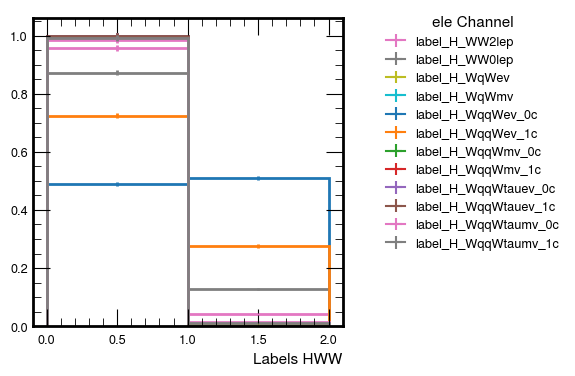

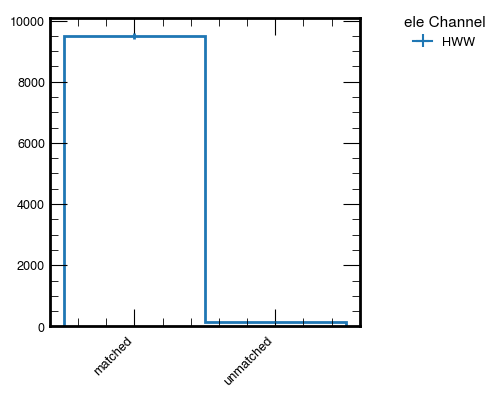

In [14]:
ss = ["HWW"]
for ch in ["ele"]:
    label_hists,match_hist,single_hist = get_label_histograms(ch,ss)

    for sample in ss:
        fig, ax = plt.subplots(figsize=(4, 4))
        for label,h in label_hists.items():
            if label not in labels_per_sample[sample]: continue
            hep.histplot(
                    h[{"samples": sample}],
                    label=label,
                    ax=ax,
                    linewidth=2,
                    color=color_by_label[label],
                    density=True,
                )
        ax.set_xlabel(f"Labels {sample}")
        ax.legend(title=f"{ch} Channel",bbox_to_anchor=(1.1, 1.05))
        
        # match hist
        """
        fig, ax = plt.subplots(figsize=(4, 4))
        hep.histplot(
            match_hist[{"samples": sample}],
            label=f"is_matched_{sample}",
            ax=ax,
            linewidth=2
        )
        ax.set_xlabel(f"Matched {sample}")
        ax.legend(title=f"{ch} Channel") 

        """
        fig, ax = plt.subplots(figsize=(4, 4))
        hep.histplot(
            single_hist[{"samples": sample}],
            label=f"{sample}",
            ax=ax,
            linewidth=2
        )
        ax.set_xlabel("")
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.legend(title=f"{ch} Channel",bbox_to_anchor=(1.1, 1.05)) 


# Make histograms for tagger probabilities

In [5]:
# do something similar but now plot the tagger probabilities for each sample (HWW, TTbar, WJetsLNu and QCD)


# use any one parquet file to get the labels/scores as a list
test_parquet = pd.read_parquet(f"{odir}/GluGluHToWW_Pt-200ToInf_M-125/outfiles/0-20_ele.parquet", engine='pyarrow')
        
probs = []
for key in test_parquet.keys():
    if "label" in key and "ParT" in key:
        probs.append(key)
        print(key)

fj_ParT_label_H_WqqWqq_0c
fj_ParT_label_H_WqqWqq_1c
fj_ParT_label_H_WqqWqq_2c
fj_ParT_label_H_WqqWq_0c
fj_ParT_label_H_WqqWq_1c
fj_ParT_label_H_WqqWq_2c
fj_ParT_label_H_WqqWev_0c
fj_ParT_label_H_WqqWev_1c
fj_ParT_label_H_WqqWmv_0c
fj_ParT_label_H_WqqWmv_1c
fj_ParT_label_H_WqqWtauev_0c
fj_ParT_label_H_WqqWtauev_1c
fj_ParT_label_H_WqqWtaumv_0c
fj_ParT_label_H_WqqWtaumv_1c
fj_ParT_label_H_WqqWtauhv_0c
fj_ParT_label_H_WqqWtauhv_1c
fj_ParT_label_H_bb
fj_ParT_label_H_cc
fj_ParT_label_H_ss
fj_ParT_label_H_qq
fj_ParT_label_H_tauhtaue
fj_ParT_label_H_tauhtaum
fj_ParT_label_H_tauhtauh
fj_ParT_label_QCD_bb
fj_ParT_label_QCD_cc
fj_ParT_label_QCD_b
fj_ParT_label_QCD_c
fj_ParT_label_QCD_others
fj_ParT_label_Top_bWqq_0c
fj_ParT_label_Top_bWqq_1c
fj_ParT_label_Top_bWq_0c
fj_ParT_label_Top_bWq_1c
fj_ParT_label_Top_bWev
fj_ParT_label_Top_bWmv
fj_ParT_label_Top_bWtauhv
fj_ParT_label_Top_bWtauev
fj_ParT_label_Top_bWtaumv


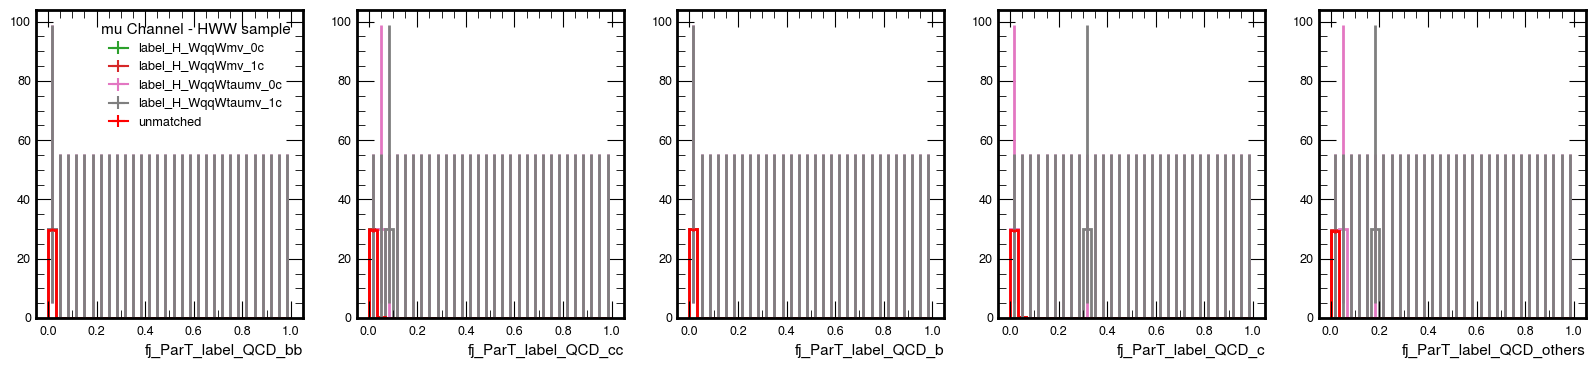

In [43]:
prob_hists = {}
for prob in probs:
    prob_hists[prob] = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.StrCategory([], name="label", growth=True),
        hist2.axis.Regular(30, 0, 1, name="prob", label=prob)   
    )
    
    
# labels to check per sample
labels_per_sample = {
    "ele": {
    "TTbar": [
        "label_Top_bWev",
        "label_Top_bWtauev",
        "label_Top_nob",
    ],
    "HWW": [
        "label_H_WqqWev_0c","label_H_WqqWev_1c",
    ],
    "WJetsLNu": [
        "label_W_ev",#"label_W_ev_0lep",
        "label_W_tauv",#"label_W_tauv_0lep",
    ],
    "DYJets": [
        "label_Z_2lep",
        "label_Z_1lep",
    ],
    "QCD": [],
    },
    "mu": {
    "TTbar": [
        "label_Top_bWmv",
        "label_Top_bWtaumv",
        "label_Top_nob",
    ],
    "HWW": [
        "label_H_WqqWmv_0c","label_H_WqqWmv_1c",
        "label_H_WqqWtaumv_0c","label_H_WqqWtaumv_1c",
    ], 
    "WJetsLNu": [
        "label_W_mv",#"label_W_mv_0lep",
        "label_W_tauv",#"label_W_tauv_0lep",
    ],
    "DYJets": [
        "label_Z_2lep",
        "label_Z_1lep",
    ],
    "QCD": [],
    }
}


#samples_to_check = ["TTbar"]
samples_to_check = ["HWW"]
#samples_to_check = ["WJetsLNu"]
#samples_to_check = ["DYJets"]
#samples_to_check = ["QCD"]

ch = "mu"

probs_by_ch = {
    "ele": [
        "fj_ParT_label_H_WqqWev_0c","fj_ParT_label_H_WqqWev_1c",
        "fj_ParT_label_H_WqqWtauev_0c","fj_ParT_label_H_WqqWtauev_1c",
        "fj_ParT_label_H_tauhtaue",
        "fj_ParT_label_Top_bWev","fj_ParT_label_Top_bWtauev",
    ],
    "mu": [
        "fj_ParT_label_H_WqqWmv_0c","fj_ParT_label_H_WqqWmv_1c",
        "fj_ParT_label_H_WqqWtaumv_0c","fj_ParT_label_H_WqqWtaumv_1c",
        "fj_ParT_label_H_tauhtaum",
        "fj_ParT_label_Top_bWmv","fj_ParT_label_Top_bWtaumv",
    ]   
}

probs_by_ch["mu"] = ["fj_ParT_label_QCD_bb","fj_ParT_label_QCD_cc",
                     "fj_ParT_label_QCD_b","fj_ParT_label_QCD_c",
                     "fj_ParT_label_QCD_others"]

#probs_by_ch["mu"] = probs

color_by_label["unmatched"] = "r"

for sample in samples_to_check:
    for s in samples_to_plot[sample]:
        parquet_files = glob.glob(f"{odir}/{s}/outfiles/*_{ch}.parquet")
            
        for parquet_file in parquet_files:
            data = pd.read_parquet(parquet_file)
            for prob in probs:
                df = pd.DataFrame()
                if sample!="QCD":
                    for lab,lab_def in labels.items():                    
                        if lab not in labels_per_sample[ch][sample]: continue
                        match_label = match_labels[sample]
                        data[lab] = data.query(lab_def)[match_label]
                        prob_hists[prob].fill(samples=sample, 
                                          prob=data.loc[data[lab]==1,prob], 
                                          label=lab)
                        df[lab] = data[lab]
                    df["unmatched"] = ~df[df.columns].any(axis='columns')
                    x = np.where(df["unmatched"],"unmatched","matched")
                    prob_hists[prob].fill(
                        samples=sample, 
                        prob=data.loc[df["unmatched"]==True,prob], 
                        label="unmatched")
                else:
                    prob_hists[prob].fill(samples=sample,
                                          prob=data[prob],
                                          label="unmatched")

    fig, axs = plt.subplots(1,len(probs_by_ch[ch]),figsize=(4*len(probs_by_ch[ch]),4))
    for i,prob in enumerate(probs_by_ch[ch]):
        for lab in (labels_per_sample[ch][sample]+["unmatched"]): 
            hep.histplot(
                prob_hists[prob][{"samples": sample,"label":lab}],
                label=lab,
                ax=axs[i],
                linewidth=2,
                color=color_by_label[lab],
                density=True,
            )
        if i==0:
            axs[i].legend(title=f"{ch} Channel - {sample} sample")
    

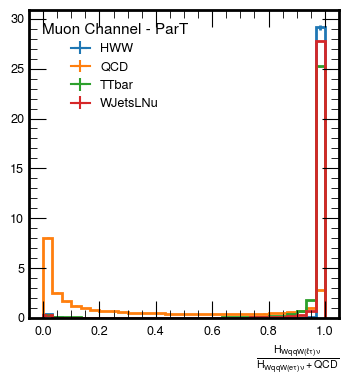

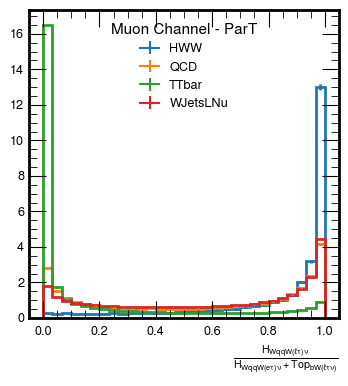

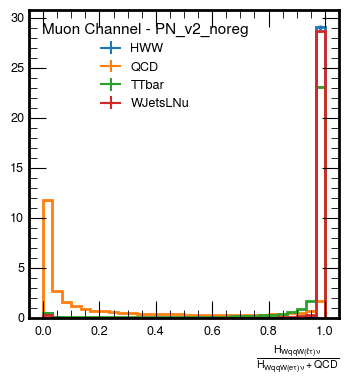

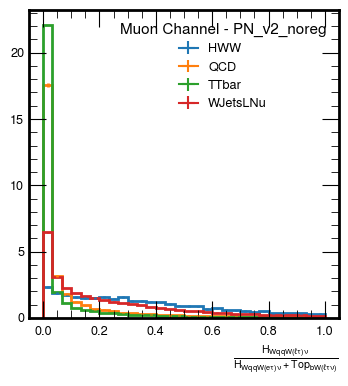

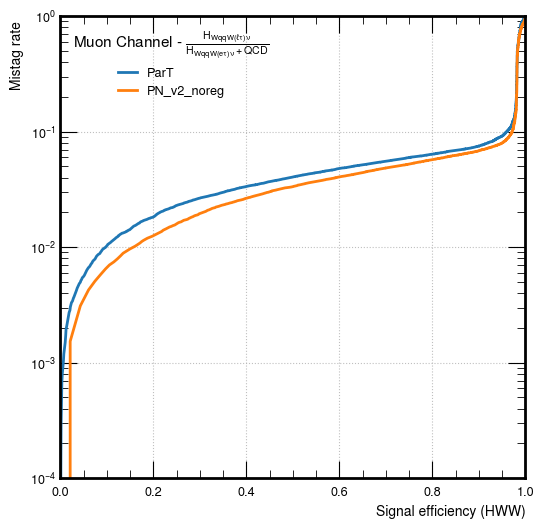

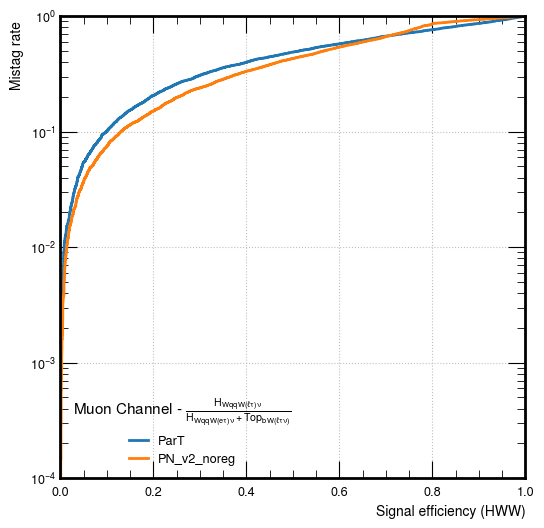

In [51]:
# scores definition
# first list is the numerator
# second list is the denominator

hwwev = ["fj_PN_label_H_WqqWev_0c","fj_PN_label_H_WqqWev_1c","fj_PN_label_H_WqqWtauev_0c","fj_PN_label_H_WqqWtauev_1c"]
hwwmv = ["fj_PN_label_H_WqqWmv_0c","fj_PN_label_H_WqqWmv_1c","fj_PN_label_H_WqqWtauev_0c","fj_PN_label_H_WqqWtaumv_1c"]
qcd = ["fj_PN_label_QCD_bb","fj_PN_label_QCD_cc","fj_PN_label_QCD_b","fj_PN_label_QCD_c","fj_PN_label_QCD_others"]
tope = ["fj_PN_label_Top_bWev","fj_PN_label_Top_bWtauev"]
topm = ["fj_PN_label_Top_bWmv","fj_PN_label_Top_bWtaumv"]


scores = {
    "ele": {
        "hww_vs_qcd": [hwwev,qcd],
        "hww_vs_top": [hwwev,tope],
    },
    "mu": {
        "hww_vs_qcd": [hwwmv,qcd],
        "hww_vs_top": [hwwmv,topm],
    }
                     
}

def disc_score(df, sigs, bkgs):
    num = df[sigs].sum(axis=1) 
    den = df[sigs].sum(axis=1) + df[bkgs].sum(axis=1)
    return num/den


ch = "mu"
roc_labels = {}
roc_scores = {}

from sklearn.metrics import auc, roc_curve

PNs = ["ParT","PN_v2_noreg"]

nicex_scores = {
    "hww_vs_qcd": r"$\frac{H_{WqqW(\ell\tau)\nu}}{H_{WqqW(e\tau)\nu}+QCD}$",
    "hww_vs_top": r"$\frac{H_{WqqW(\ell\tau)\nu}}{H_{WqqW(e\tau)\nu}+Top_{bW(\ell\tau\nu)}}$",
}

nice_channel = {
    "mu": "Muon",
    "ele": "Electron"
}

for pn_version in PNs:
    pn_scores = {}
    roc_labels[pn_version] = {}
    roc_scores[pn_version] = {}
    for score,(sig,bkg) in scores[ch].items():
        new_sig = [s.replace("PN",pn_version) for s in sig]
        new_bkg = [s.replace("PN",pn_version) for s in bkg]
    
        pn_scores[score] = [new_sig,new_bkg]
        
        roc_labels[pn_version][score] = []
        roc_scores[pn_version][score] = []
        
    score_hists = {}
    for score in pn_scores.keys():
        score_hists[score] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(30, 0, 1, name="score", label=score)   
        )


    samples_to_process = ["HWW","QCD","TTbar","WJetsLNu"]

    for sample in samples_to_process:
        for s in samples_to_plot[sample]:
            parquet_files = glob.glob(f"{odir}/{s}/outfiles/*_{ch}.parquet")
            for parquet_file in parquet_files:
                data = pd.read_parquet(parquet_file)
                        
                # apply isolation cut
                data = data.query("( (lep_pt < 50) & (lep_isolation < 0.15) ) | (lep_pt >= 50)")

                    
                for lab,lab_def in labels.items():                    
                    if lab not in labels_per_sample[ch][sample]: continue
                    match_label = match_labels[sample]
                    data[lab] = data.query(lab_def)[match_label]
                    #print(lab)

                for score,(sigs,bkgs) in pn_scores.items():
                    data[score] = disc_score(data,sigs,bkgs)
                    #print("score ",score,sigs,bkgs)
                    score_hists[score].fill(samples=sample,score=data[score])
                
                    # all backgrounds roc
                    """
                    roc_scores[pn_version][score] += data[score].tolist()
                    label = 1 if "HWW" in sample else 0  
                    roc_labels[pn_version][score] += [label] * len(data["fj_pt"].tolist())
                    """
         
                    if score=="hww_vs_qcd" and sample in ["HWW","QCD"]:
                        roc_scores[pn_version][score] += data[score].tolist()
                        if "QCD" in sample:
                            label = [0] * len(data["fj_pt"].tolist())
                        else:
                            #print(sample)
                            #print(data.columns)
                            label = (data["label_H_WqqWmv_0c"] | data["label_H_WqqWmv_1c"] | data["label_H_WqqWtaumv_0c"] | data["label_H_WqqWtaumv_1c"]).tolist()

                        roc_labels[pn_version][score] += label
                    if score=="hww_vs_top" and sample in ["HWW","Top"]:
                        roc_scores[pn_version][score] += data[score].tolist()
                        if "Top" in sample:
                            label = (data["label_Top_bWmv"] | data["label_Top_bWtaumv"] | data["label_Top_nob"]).tolist()
                        else:
                            label = (data["label_H_WqqWmv_0c"] | data["label_H_WqqWmv_1c"] | data["label_H_WqqWtaumv_0c"] | data["label_H_WqqWtaumv_1c"]).tolist()
       
                        roc_labels[pn_version][score] += label

    for score in scores[ch].keys():
        fig, ax = plt.subplots(figsize=(4,4))
        for sample in samples_to_process:
            hep.histplot(
                score_hists[score][{"samples":sample}],
                label=sample,
                ax=ax,
                linewidth=2,
                density=True,
            )
        xlab = nicex_scores[score]
        ax.set_xlabel(xlab)
        xch = nice_channel[ch]
        ax.legend(title=f"{xch} Channel - {pn_version}")
    

for score in scores[ch].keys():
    fig, ax = plt.subplots(figsize=(6,6))
    ax.grid()
    for pn_version in PNs:
        fpr, tpr, _ = roc_curve(roc_labels[pn_version][score], roc_scores[pn_version][score])
        ax.plot(tpr,fpr,linewidth=2,linestyle='solid',label=pn_version)
    ax.set_xlim(0, 1)
    ax.set_ylim(1e-4,1)
    ax.set_xlabel(f'Signal efficiency (HWW)', fontsize=10, ha='right', x=1)
    #ax.set_ylabel(f'Mistag rate (QCD+WJetsLNu+TT)', fontsize=10, ha='right', y=1)
    ax.set_ylabel(f'Mistag rate ', fontsize=10, ha='right', y=1)
    ax.set_yscale('log')
    xlab = nicex_scores[score]
    xch = nice_channel[ch]
    ax.legend(title=f"{xch} Channel - {xlab}")
